## 1 Question
1. Problem of Stock Prediction: You are given stock prices of Google Inc. of the past three years. The features you will be using are: 1) Average of the low and high of the Google Inc. stock for the day. 2) Volume of the stocks traded for the day. These will be used by you for predicting stock prices. Data set : http://preon.iiit.ac.in/~sanjoy_chowdhury/GoogleStocks.csv You are free to use library (Keras/ TensorFlow) for Part-1 and Part-2 of this question.
1. Part-1: (30 points) RNN Perform stock prediction using RNN for the following conﬁgurations
Number of Number of cells Number of Hidden Layers in hidden layers Time steps 2 30,50,80 20,50,75 3 30,50,80 20,50,75
Note: Get results for total 18 combinations from above table. For example, 1 combination will contain 2 hidden layers , the number of RNN cells will be 30 units and the number of time steps will be 20. So this combination will be denoted as RNN (2,30,20).



In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("GoogleStocks.csv")
print(dataframe.shape)
dataframe.head()


(756, 6)


,date,close,volume,open,high,low
0,15:07,"1,169.41","1,037,784","1,185.50","1,187.559","1,159.37"
1,2019/03/26,1184.6200,1894639.0000,1198.5300,1202.8300,1176.7200
2,2019/03/25,1193.0000,1493841.0000,1196.9300,1206.3975,1187.0400
3,2019/03/22,1205.5000,1668910.0000,1226.3200,1230.0000,1202.8250
4,2019/03/21,1231.5400,1195899.0000,1216.0000,1231.7900,1213.1500


we will use 2 features to predict the open prices
> average of high and low <br>
> volume of stocks

In [3]:
#REMOVE THE FIRST ROW
dataframe = dataframe.iloc[1:,:]
dataframe.shape

(755, 6)

In [4]:
dataframe["date"] = pd.to_datetime(dataframe["date"])

In [5]:
dataframe = dataframe.sort_values(by='date',ascending = True)
dataframe.head()

,date,close,volume,open,high,low
755,2016-03-28,733.5300,1300817.0000,736.7900,738.9900,732.5000
754,2016-03-29,744.7700,1902254.0000,734.5900,747.2500,728.7600
753,2016-03-30,750.5300,1782278.0000,750.1000,757.8800,748.7400
752,2016-03-31,744.9500,1718638.0000,749.2500,750.8500,740.9400
751,2016-04-01,749.9100,1576240.0000,738.6000,750.3400,737.0000


In [6]:
data = dataframe.iloc[:,1:6].astype(float)
data.shape
data.head()

,close,volume,open,high,low
755,733.53,1300817.0,736.79,738.99,732.50
754,744.77,1902254.0,734.59,747.25,728.76
753,750.53,1782278.0,750.10,757.88,748.74
752,744.95,1718638.0,749.25,750.85,740.94
751,749.91,1576240.0,738.60,750.34,737.00


In [7]:
avg= (data["high"] + data["low"])/2
print(avg.shape)
avg.head()


(755,)


755    735.745
754    738.005
753    753.310
752    745.895
751    743.670
dtype: float64

In [8]:
# labels = data["open"]
del data["close"]
# del data["open"]
del data["high"]
del data["low"]

In [9]:
data["average"] = avg
data.head()


,volume,open,average
755,1300817.0,736.79,735.745
754,1902254.0,734.59,738.005
753,1782278.0,750.10,753.310
752,1718638.0,749.25,745.895
751,1576240.0,738.60,743.670


In [10]:
#scale the features from 0 to 1
from sklearn.preprocessing import MinMaxScaler
data = MinMaxScaler().fit_transform(data)
data[1:5]

array([[0.2522322 , 0.10598333, 0.11868256],
       [0.23006657, 0.13183333, 0.14455293],
       [0.21830904, 0.13041667, 0.1320192 ],
       [0.19200093, 0.11266667, 0.12825823]])

In [11]:
data = pd.DataFrame(data)
labels = data.iloc[:,1]
del data[1]

In [12]:
data = np.array(data)

In [13]:
#spliting into train and test

X_train = data[:int(0.8*len(data)),:]
Y_train = labels[:int(0.8*len(labels))]
X_test = data[int(0.8*len(data)):,:]
Y_test = labels[int(0.8*len(labels)):]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(604, 2)
(604,)
(151, 2)
(151,)


In [125]:
def create_features(time_steps, X_train, labels):
    features = []
    LABELS = []

    training_length = time_steps
    labels = np.array(labels)
    for i in range(training_length, len(X_train)):
        extract = X_train[i - training_length:i]

        # Set the features and label
        features.append(extract)
        LABELS.append(labels[i])

    features = np.array(features)
    return features, LABELS

In [147]:
class RNN():
    def __init__(self , input_shape, output_dim,num_hidden_layers=2 , list_num_nodes=[64, 64]):
#         self.training_length = time_steps
        self.num_hidden_layers = num_hidden_layers
        self.list_num_nodes = list_num_nodes
        from keras.models import Sequential
        from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
        from keras import losses


        self.model = Sequential()
        self.model.add(LSTM(units = list_num_nodes[0], return_sequences=True, input_shape = input_shape))
        for i in range(1, num_hidden_layers):
            if i == num_hidden_layers-1:
                self.model.add(LSTM(units = list_num_nodes[i]))
            else:
                self.model.add(LSTM(units = list_num_nodes[i], return_sequences=True))
        self.model.add(Dense(1, activation = "relu"))
        self.model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    def fit(self,features ,  labels, epochs, batch_size):
        self.model.fit(features , labels , batch_size = batch_size, epochs = epochs)

### LSTM with Hidden Layers =2 and nodes = [30,30], time step = 20

In [168]:
myrnn = RNN((20,2), 1 ,list_num_nodes=[30,30])

In [169]:
features, label = create_features(20, X_train, Y_train)
print(features.shape)
print(len(label))

(584, 20, 2)
584


In [170]:
myrnn.fit(features, label, 100, 60)

Epoch 1/100
584/584 [==============================] - 7s 12ms/step - loss: 0.0912 - mean_absolute_error: 0.2335
Epoch 2/100
584/584 [==============================] - 0s 312us/step - loss: 0.0149 - mean_absolute_error: 0.1107
Epoch 3/100
584/584 [==============================] - 0s 293us/step - loss: 0.0062 - mean_absolute_error: 0.0610
Epoch 4/100
584/584 [==============================] - 0s 317us/step - loss: 0.0033 - mean_absolute_error: 0.0436
Epoch 5/100
584/584 [==============================] - 0s 314us/step - loss: 0.0024 - mean_absolute_error: 0.0379
Epoch 6/100
584/584 [==============================] - 0s 299us/step - loss: 0.0018 - mean_absolute_error: 0.0326
Epoch 7/100
584/584 [==============================] - 0s 307us/step - loss: 0.0018 - mean_absolute_error: 0.0319
Epoch 8/100
584/584 [==============================] - 0s 301us/step - loss: 0.0017 - mean_absolute_error: 0.0317
Epoch 9/100
584/584 [==============================] - 0s 289us/step - loss: 0.0016 - mea

In [171]:
X_test_reshape, Y_test_reshape =  create_features(20, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

0.017068854005744195


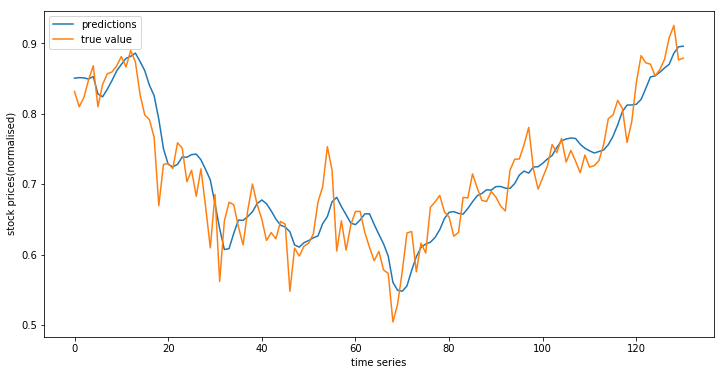

In [172]:
def plotpred(pred, Y_test_reshape):
    import matplotlib.pyplot as plt
    x=[]
    for i in range(0,len(pred)):
        x.append(i)
    plt.figure(figsize=(12,6))
    plt.plot(x, pred, label = "predictions")
    plt.plot(x, Y_test_reshape, label = "true value")
    plt.xlabel("time series")
    plt.ylabel("stock prices(normalised)")
    plt.legend()
    plt.show()
plotpred(pred, Y_test_reshape)

### LSTM with Hidden Layers =2 and nodes = [50,50], time step = 20

In [173]:
myrnn = RNN((20,2), 1 ,list_num_nodes=[50,50])
myrnn.fit(features, label, 100, 60)

Epoch 1/100
584/584 [==============================] - 8s 13ms/step - loss: 0.0695 - mean_absolute_error: 0.1988
Epoch 2/100
584/584 [==============================] - 0s 340us/step - loss: 0.0166 - mean_absolute_error: 0.1073
Epoch 3/100
584/584 [==============================] - 0s 343us/step - loss: 0.0067 - mean_absolute_error: 0.0619
Epoch 4/100
584/584 [==============================] - 0s 446us/step - loss: 0.0032 - mean_absolute_error: 0.0437
Epoch 5/100
584/584 [==============================] - 0s 480us/step - loss: 0.0023 - mean_absolute_error: 0.0359
Epoch 6/100
584/584 [==============================] - 0s 449us/step - loss: 0.0019 - mean_absolute_error: 0.0321
Epoch 7/100
584/584 [==============================] - 0s 349us/step - loss: 0.0016 - mean_absolute_error: 0.0299
Epoch 8/100
584/584 [==============================] - 0s 348us/step - loss: 0.0016 - mean_absolute_error: 0.0300
Epoch 9/100
584/584 [==============================] - 0s 340us/step - loss: 0.0016 - mea

In [175]:
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

0.018424426728249163


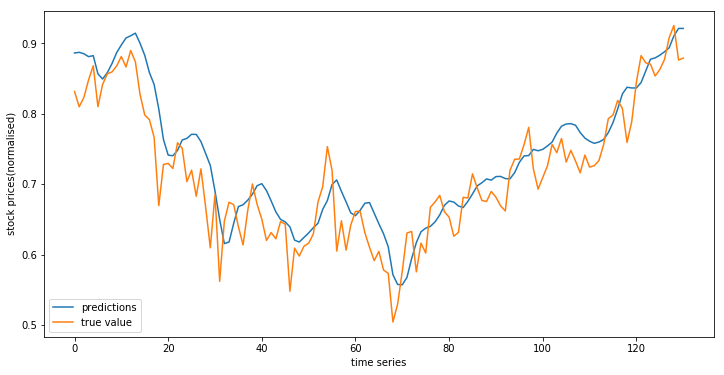

In [176]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [80,80], time step = 20

In [177]:
myrnn = RNN((20,2), 1 ,list_num_nodes=[80,80])
myrnn.fit(features, label, 100, 60)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
584/584 [==============================] - 8s 14ms/step - loss: 0.0765 - mean_absolute_error: 0.2170
Epoch 2/100
584/584 [==============================] - 0s 830us/step - loss: 0.0138 - mean_absolute_error: 0.0924
Epoch 3/100
584/584 [==============================] - 0s 830us/step - loss: 0.0062 - mean_absolute_error: 0.0667
Epoch 4/100
584/584 [==============================] - 1s 914us/step - loss: 0.0027 - mean_absolute_error: 0.0394
Epoch 5/100
584/584 [==============================] - 1s 899us/step - loss: 0.0018 - mean_absolute_error: 0.0309
Epoch 6/100
584/584 [==============================] - 1s 1ms/step - loss: 0.0016 - mean_absolute_error: 0.0310
Epoch 7/100
584/584 [==============================] - 1s 873us/step - loss: 0.0015 - mean_absolute_error: 0.0295
Epoch 8/100
584/584 [==============================] - 1s 859us/step - loss: 0.0015 - mean_absolute_error: 0.0296
Epoch 9/100
584/584 [==============================] - 1s 868us/step - loss: 0.0015 - mean_

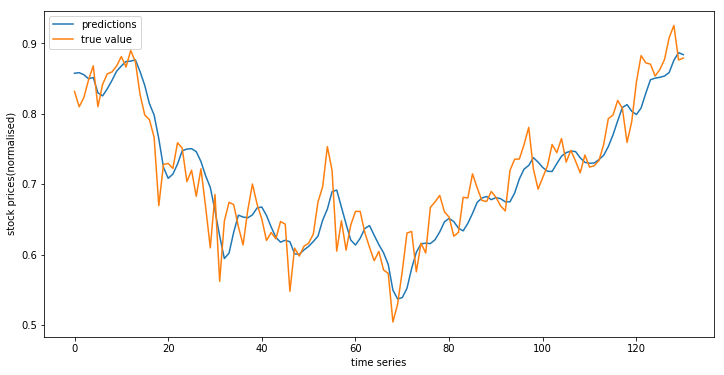

In [178]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [30,30], time step = 50

In [179]:
myrnn = RNN((50,2), 1 ,list_num_nodes=[30,30])
features, label = create_features(50, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
X_test_reshape, Y_test_reshape = create_features(50, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
554/554 [==============================] - 9s 15ms/step - loss: 0.1603 - mean_absolute_error: 0.3389
Epoch 2/100
554/554 [==============================] - 0s 675us/step - loss: 0.0217 - mean_absolute_error: 0.1256
Epoch 3/100
554/554 [==============================] - 0s 664us/step - loss: 0.0075 - mean_absolute_error: 0.0695
Epoch 4/100
554/554 [==============================] - 0s 682us/step - loss: 0.0063 - mean_absolute_error: 0.0601
Epoch 5/100
554/554 [==============================] - 0s 677us/step - loss: 0.0036 - mean_absolute_error: 0.0498
Epoch 6/100
554/554 [==============================] - 0s 697us/step - loss: 0.0024 - mean_absolute_error: 0.0379
Epoch 7/100
554/554 [==============================] - 0s 728us/step - loss: 0.0019 - mean_absolute_error: 0.0342
Epoch 8/100
554/554 [==============================] - 0s 733us/step - loss: 0.0019 - mean_absolute_error: 0.0336
Epoch 9/100
554/554 [==============================] - 1s 976us/step - loss: 0.0019 - mea

554/554 [==============================] - 0s 887us/step - loss: 0.0011 - mean_absolute_error: 0.0243
Epoch 73/100
554/554 [==============================] - 0s 841us/step - loss: 0.0011 - mean_absolute_error: 0.0245
Epoch 74/100
554/554 [==============================] - 0s 833us/step - loss: 0.0010 - mean_absolute_error: 0.0242
Epoch 75/100
554/554 [==============================] - 0s 842us/step - loss: 0.0010 - mean_absolute_error: 0.0243
Epoch 76/100
554/554 [==============================] - 0s 846us/step - loss: 0.0010 - mean_absolute_error: 0.0238
Epoch 77/100
554/554 [==============================] - 0s 850us/step - loss: 9.5797e-04 - mean_absolute_error: 0.0234
Epoch 78/100
554/554 [==============================] - 0s 827us/step - loss: 9.8547e-04 - mean_absolute_error: 0.0234
Epoch 79/100
554/554 [==============================] - 0s 859us/step - loss: 0.0010 - mean_absolute_error: 0.0239
Epoch 80/100
554/554 [==============================] - 0s 826us/step - loss: 9.0950e

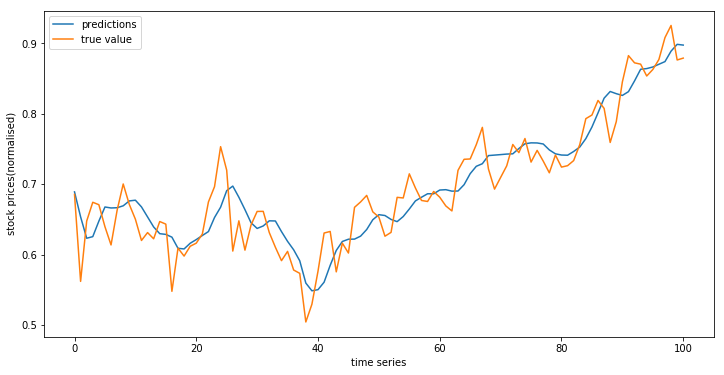

In [180]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [50,50], time step = 50

In [181]:
myrnn = RNN((50,2), 1 ,list_num_nodes=[50,50])
# features, label = create_features(50, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
# X_test_reshape, Y_test_reshape = create_features(50, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
554/554 [==============================] - 8s 15ms/step - loss: 0.0984 - mean_absolute_error: 0.2374
Epoch 2/100
554/554 [==============================] - 0s 751us/step - loss: 0.0227 - mean_absolute_error: 0.1249
Epoch 3/100
554/554 [==============================] - 0s 767us/step - loss: 0.0132 - mean_absolute_error: 0.0918
Epoch 4/100
554/554 [==============================] - 0s 703us/step - loss: 0.0066 - mean_absolute_error: 0.0667
Epoch 5/100
554/554 [==============================] - 0s 901us/step - loss: 0.0031 - mean_absolute_error: 0.0419
Epoch 6/100
554/554 [==============================] - 1s 910us/step - loss: 0.0023 - mean_absolute_error: 0.0355
Epoch 7/100
554/554 [==============================] - 0s 895us/step - loss: 0.0022 - mean_absolute_error: 0.0340
Epoch 8/100
554/554 [==============================] - 0s 831us/step - loss: 0.0020 - mean_absolute_error: 0.0329
Epoch 9/100
554/554 [==============================] - 0s 776us/step - loss: 0.0018 - mea

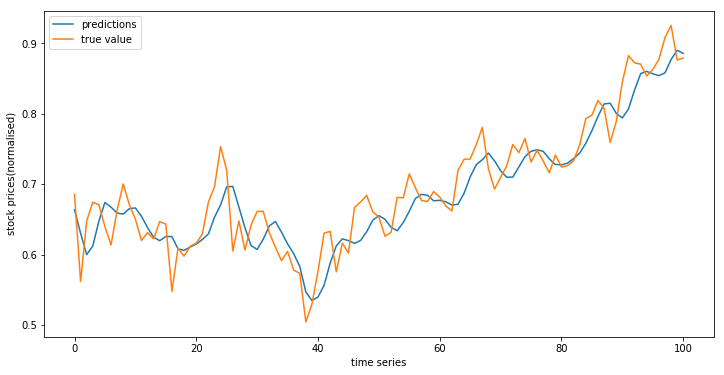

In [182]:
plotpred(pred, Y_test_reshape)

This works better than the previous models, mse is 0.014566...

## LSTM with Hidden Layers =2 and nodes = [80,80], time step = 50

In [183]:
myrnn = RNN((50,2), 1 ,list_num_nodes=[80,80])
myrnn.fit(features, label, 100, 60)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
554/554 [==============================] - 9s 17ms/step - loss: 0.0876 - mean_absolute_error: 0.2318
Epoch 2/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0130 - mean_absolute_error: 0.0901
Epoch 3/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0617
Epoch 4/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0386
Epoch 5/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0323
Epoch 6/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0329
Epoch 7/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0309
Epoch 8/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0301
Epoch 9/100
554/554 [==============================] - 1s 2ms/step - loss: 0.0016 - mean_absolute_error

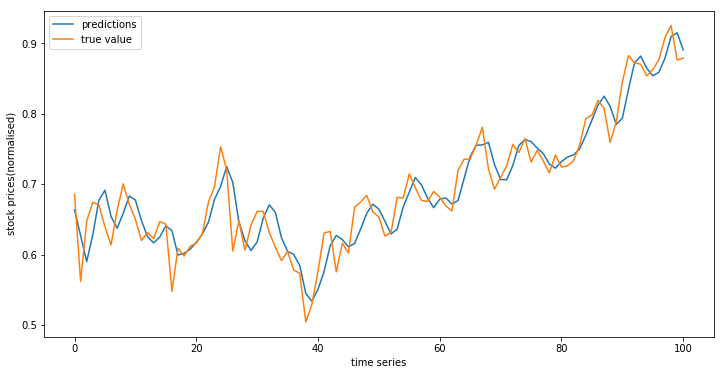

In [184]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [30,30], time step = 75

In [186]:
myrnn = RNN((75,2), 1 ,list_num_nodes=[30,30])
features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
529/529 [==============================] - 9s 18ms/step - loss: 0.1158 - mean_absolute_error: 0.2757
Epoch 2/100
529/529 [==============================] - 1s 956us/step - loss: 0.0175 - mean_absolute_error: 0.1158
Epoch 3/100
529/529 [==============================] - 1s 982us/step - loss: 0.0090 - mean_absolute_error: 0.0783
Epoch 4/100
529/529 [==============================] - 0s 915us/step - loss: 0.0078 - mean_absolute_error: 0.0691
Epoch 5/100
529/529 [==============================] - 1s 972us/step - loss: 0.0043 - mean_absolute_error: 0.0539
Epoch 6/100
529/529 [==============================] - 1s 981us/step - loss: 0.0028 - mean_absolute_error: 0.0420
Epoch 7/100
529/529 [==============================] - 1s 947us/step - loss: 0.0022 - mean_absolute_error: 0.0359
Epoch 8/100
529/529 [==============================] - 1s 998us/step - loss: 0.0020 - mean_absolute_error: 0.0326
Epoch 9/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_

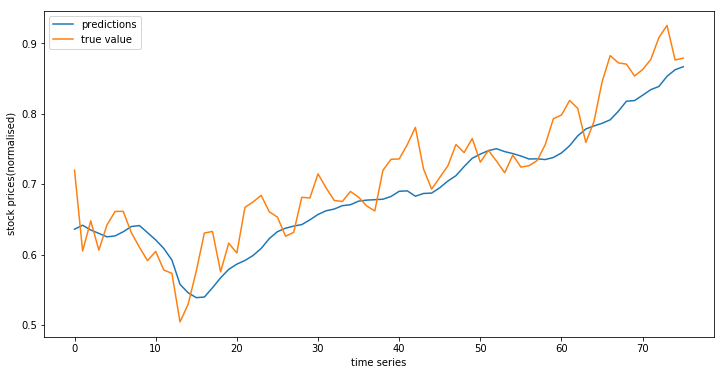

In [187]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [50,50], time step = 75

In [188]:
myrnn = RNN((75,2), 1 ,list_num_nodes=[50,50])
# features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
# X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
529/529 [==============================] - 10s 19ms/step - loss: 0.1095 - mean_absolute_error: 0.2547
Epoch 2/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0176 - mean_absolute_error: 0.1145
Epoch 3/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0100 - mean_absolute_error: 0.0760
Epoch 4/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0556
Epoch 5/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0405
Epoch 6/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0332
Epoch 7/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_absolute_error: 0.0328
Epoch 8/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0017 - mean_absolute_error: 0.0313
Epoch 9/100
529/529 [==============================] - 1s 1ms/step - loss: 0.0017 - mean_absolute_erro

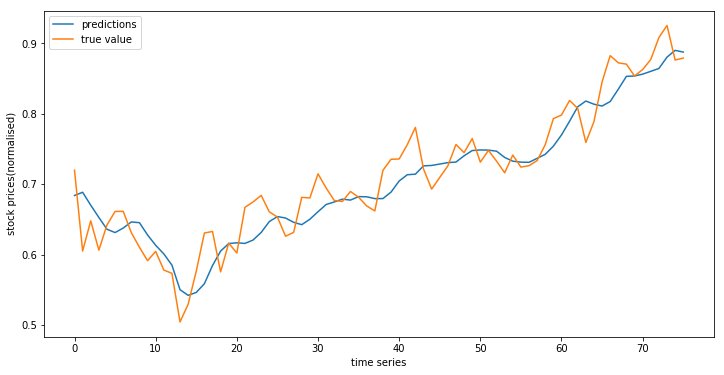

In [190]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =2 and nodes = [80,80], time step = 75

In [191]:
myrnn = RNN((75,2), 1 ,list_num_nodes=[80,80])
# features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
# X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
529/529 [==============================] - 11s 22ms/step - loss: 0.0784 - mean_absolute_error: 0.2210
Epoch 2/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0137 - mean_absolute_error: 0.0914
Epoch 3/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0637
Epoch 4/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0038 - mean_absolute_error: 0.0493
Epoch 5/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0024 - mean_absolute_error: 0.0363
Epoch 6/100
529/529 [==============================] - 2s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0323
Epoch 7/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0311
Epoch 8/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0302
Epoch 9/100
529/529 [==============================] - 2s 5ms/step - loss: 0.0016 - mean_absolute_erro

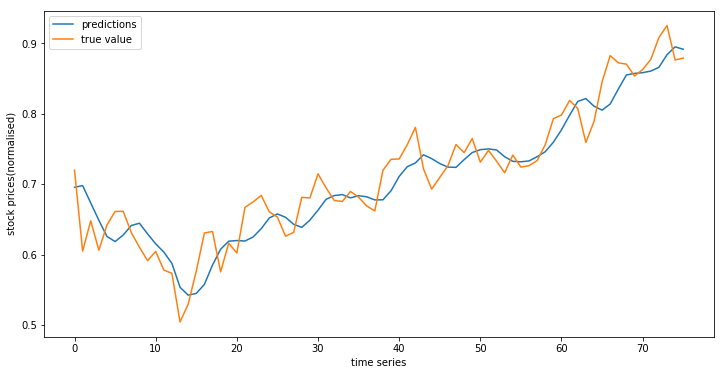

In [192]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [30,30,30], time step = 20

In [194]:
myrnn = RNN((20,2), 1 ,num_hidden_layers=3,list_num_nodes=[30,30,30])
features, label = create_features(20, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
X_test_reshape, Y_test_reshape = create_features(20, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
584/584 [==============================] - 11s 19ms/step - loss: 0.1181 - mean_absolute_error: 0.2664
Epoch 2/100
584/584 [==============================] - 0s 489us/step - loss: 0.0238 - mean_absolute_error: 0.1330
Epoch 3/100
584/584 [==============================] - 0s 455us/step - loss: 0.0126 - mean_absolute_error: 0.0875
Epoch 4/100
584/584 [==============================] - 0s 496us/step - loss: 0.0056 - mean_absolute_error: 0.0609
Epoch 5/100
584/584 [==============================] - 0s 468us/step - loss: 0.0033 - mean_absolute_error: 0.0444
Epoch 6/100
584/584 [==============================] - 0s 484us/step - loss: 0.0028 - mean_absolute_error: 0.0384
Epoch 7/100
584/584 [==============================] - 0s 472us/step - loss: 0.0025 - mean_absolute_error: 0.0383
Epoch 8/100
584/584 [==============================] - 0s 442us/step - loss: 0.0023 - mean_absolute_error: 0.0363
Epoch 9/100
584/584 [==============================] - 0s 485us/step - loss: 0.0024 - me

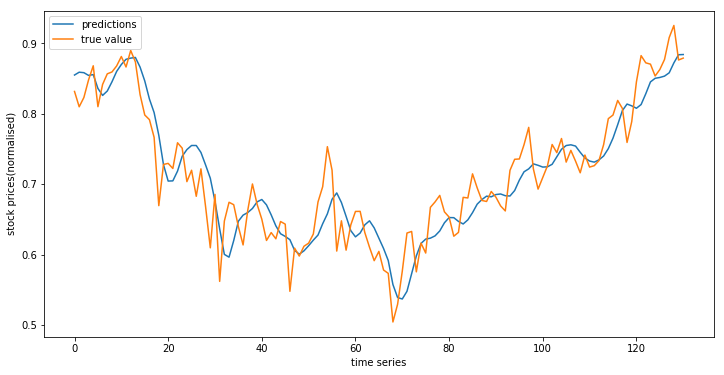

In [195]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [50,50,50], time step = 20

In [196]:
myrnn = RNN((20,2), 1 ,num_hidden_layers=3,list_num_nodes=[50,50,50])
# features, label = create_features(20, X_train, Y_train)
myrnn.fit(features, label, 100, 60)
# X_test_reshape, Y_test_reshape = create_features(20, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
584/584 [==============================] - 12s 20ms/step - loss: 0.0897 - mean_absolute_error: 0.2305
Epoch 2/100
584/584 [==============================] - 0s 685us/step - loss: 0.0181 - mean_absolute_error: 0.1088
Epoch 3/100
584/584 [==============================] - 0s 562us/step - loss: 0.0078 - mean_absolute_error: 0.0717
Epoch 4/100
584/584 [==============================] - 0s 571us/step - loss: 0.0043 - mean_absolute_error: 0.0495
Epoch 5/100
584/584 [==============================] - 0s 587us/step - loss: 0.0032 - mean_absolute_error: 0.0423
Epoch 6/100
584/584 [==============================] - 0s 566us/step - loss: 0.0031 - mean_absolute_error: 0.0425
Epoch 7/100
584/584 [==============================] - 0s 605us/step - loss: 0.0024 - mean_absolute_error: 0.0374
Epoch 8/100
584/584 [==============================] - 0s 593us/step - loss: 0.0025 - mean_absolute_error: 0.0374
Epoch 9/100
584/584 [==============================] - 0s 714us/step - loss: 0.0025 - me

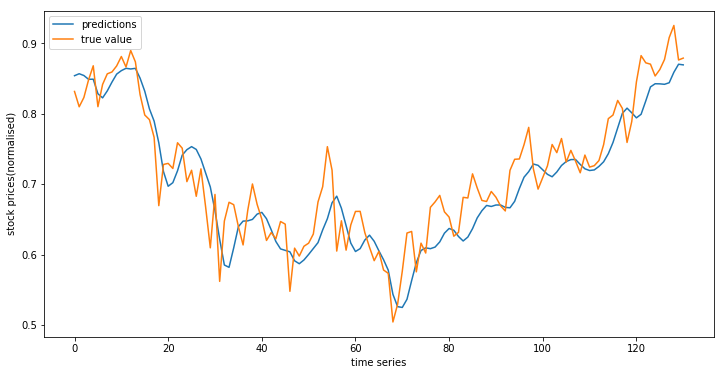

In [199]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [80,80,80], time step = 20

In [201]:
myrnn = RNN((20,2), 1 ,num_hidden_layers=3,list_num_nodes=[80,80,80])
# features, label = create_features(20, X_train, Y_train)
myrnn.fit(features, label, 150, 60)
# X_test_reshape, Y_test_reshape = create_features(20, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/150
584/584 [==============================] - 13s 23ms/step - loss: 0.0826 - mean_absolute_error: 0.2270
Epoch 2/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0979
Epoch 3/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0063 - mean_absolute_error: 0.0639
Epoch 4/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0491
Epoch 5/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0414
Epoch 6/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0385
Epoch 7/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0377
Epoch 8/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0023 - mean_absolute_error: 0.0364
Epoch 9/150
584/584 [==============================] - 1s 2ms/step - loss: 0.0022 - mean_absolute_erro

584/584 [==============================] - 1s 2ms/step - loss: 3.2621e-04 - mean_absolute_error: 0.0130
Epoch 143/150
584/584 [==============================] - 1s 2ms/step - loss: 3.0013e-04 - mean_absolute_error: 0.0123
Epoch 144/150
584/584 [==============================] - 1s 2ms/step - loss: 3.0156e-04 - mean_absolute_error: 0.0123
Epoch 145/150
584/584 [==============================] - 1s 2ms/step - loss: 3.0407e-04 - mean_absolute_error: 0.0127
Epoch 146/150
584/584 [==============================] - 1s 2ms/step - loss: 2.8726e-04 - mean_absolute_error: 0.0121
Epoch 147/150
584/584 [==============================] - 1s 2ms/step - loss: 3.1489e-04 - mean_absolute_error: 0.0131
Epoch 148/150
584/584 [==============================] - 1s 2ms/step - loss: 3.1890e-04 - mean_absolute_error: 0.0127
Epoch 149/150
584/584 [==============================] - 1s 2ms/step - loss: 3.2788e-04 - mean_absolute_error: 0.0131
Epoch 150/150
584/584 [==============================] - 1s 2ms/step -

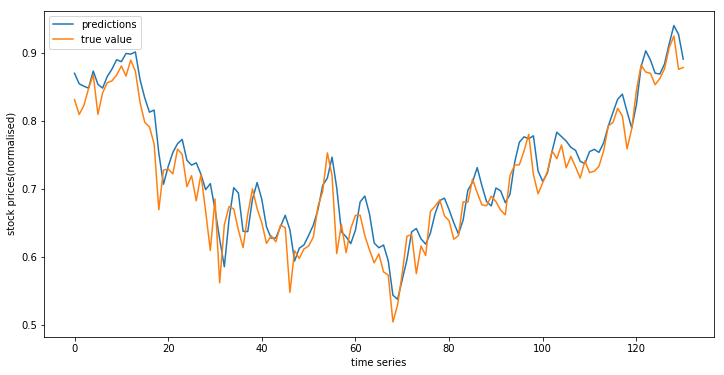

In [202]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [30,30,30], time step = 50

In [204]:
myrnn = RNN((50,2), 1 ,num_hidden_layers=3,list_num_nodes=[30,30,30])
features, label = create_features(50, X_train, Y_train)
myrnn.fit(features, label, 150, 60)
X_test_reshape, Y_test_reshape = create_features(50, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/150
554/554 [==============================] - 14s 26ms/step - loss: 0.1100 - mean_absolute_error: 0.2610
Epoch 2/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0252 - mean_absolute_error: 0.1361
Epoch 3/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0137 - mean_absolute_error: 0.0927
Epoch 4/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0703
Epoch 5/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0494
Epoch 6/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0432
Epoch 7/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0033 - mean_absolute_error: 0.0411
Epoch 8/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0413
Epoch 9/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0027 - mean_absolute_erro

554/554 [==============================] - 1s 2ms/step - loss: 5.3167e-04 - mean_absolute_error: 0.0179
Epoch 144/150
554/554 [==============================] - 1s 2ms/step - loss: 5.7524e-04 - mean_absolute_error: 0.0185
Epoch 145/150
554/554 [==============================] - 1s 2ms/step - loss: 7.3915e-04 - mean_absolute_error: 0.0208
Epoch 146/150
554/554 [==============================] - 1s 2ms/step - loss: 5.7424e-04 - mean_absolute_error: 0.0182
Epoch 147/150
554/554 [==============================] - 1s 2ms/step - loss: 4.9732e-04 - mean_absolute_error: 0.0171
Epoch 148/150
554/554 [==============================] - 1s 2ms/step - loss: 5.0410e-04 - mean_absolute_error: 0.0171
Epoch 149/150
554/554 [==============================] - 1s 2ms/step - loss: 5.2652e-04 - mean_absolute_error: 0.0177
Epoch 150/150
554/554 [==============================] - 1s 2ms/step - loss: 5.0258e-04 - mean_absolute_error: 0.0171
0.015034304188615484


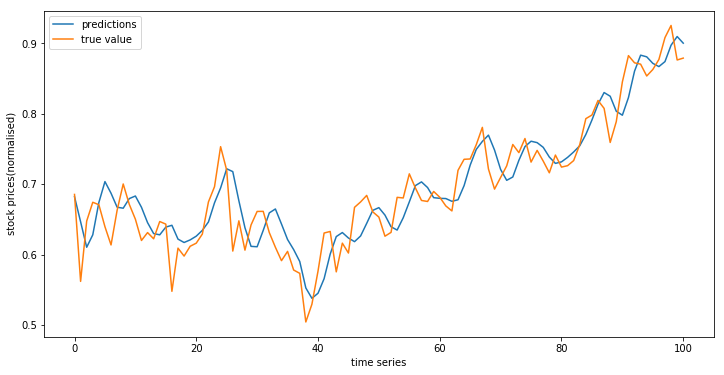

In [205]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [50,50,50], time step = 50

In [208]:
myrnn = RNN((50,2), 1 ,num_hidden_layers=3,list_num_nodes=[50,50,50])
# features, label = create_features(50, X_train, Y_train)
myrnn.fit(features, label, 150, 60)
# X_test_reshape, Y_test_reshape = create_features(50, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/150
554/554 [==============================] - 15s 27ms/step - loss: 0.0959 - mean_absolute_error: 0.2439
Epoch 2/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0181 - mean_absolute_error: 0.1094
Epoch 3/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0093 - mean_absolute_error: 0.0803
Epoch 4/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0048 - mean_absolute_error: 0.0551
Epoch 5/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0408
Epoch 6/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0385
Epoch 7/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0024 - mean_absolute_error: 0.0368
Epoch 8/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0023 - mean_absolute_error: 0.0355
Epoch 9/150
554/554 [==============================] - 1s 1ms/step - loss: 0.0022 - mean_absolute_erro

554/554 [==============================] - 1s 2ms/step - loss: 4.3221e-04 - mean_absolute_error: 0.0154
Epoch 143/150
554/554 [==============================] - 1s 2ms/step - loss: 3.8906e-04 - mean_absolute_error: 0.0148
Epoch 144/150
554/554 [==============================] - 1s 2ms/step - loss: 3.8037e-04 - mean_absolute_error: 0.0143
Epoch 145/150
554/554 [==============================] - 1s 2ms/step - loss: 3.8816e-04 - mean_absolute_error: 0.0147
Epoch 146/150
554/554 [==============================] - 1s 2ms/step - loss: 3.8276e-04 - mean_absolute_error: 0.0145
Epoch 147/150
554/554 [==============================] - 1s 2ms/step - loss: 4.3452e-04 - mean_absolute_error: 0.0157
Epoch 148/150
554/554 [==============================] - 1s 2ms/step - loss: 6.5467e-04 - mean_absolute_error: 0.0196
Epoch 149/150
554/554 [==============================] - 1s 2ms/step - loss: 4.6284e-04 - mean_absolute_error: 0.0157
Epoch 150/150
554/554 [==============================] - 1s 2ms/step -

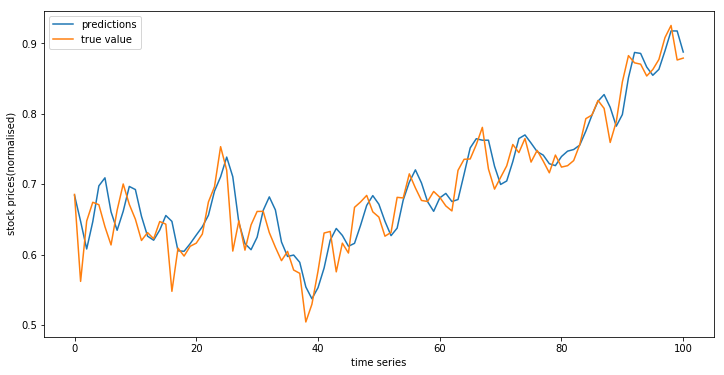

In [209]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [80,80,80], time step = 50

In [215]:
myrnn = RNN((50,2), 1 ,num_hidden_layers=3,list_num_nodes=[80,80,80])
# features, label = create_features(50, X_train, Y_train)
myrnn.fit(features, label, 100, 80)
# X_test_reshape, Y_test_reshape = create_features(50, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
554/554 [==============================] - 21s 38ms/step - loss: 0.1090 - mean_absolute_error: 0.2602
Epoch 2/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.1110
Epoch 3/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0858
Epoch 4/100
554/554 [==============================] - 2s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0590
Epoch 5/100
554/554 [==============================] - 3s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0448
Epoch 6/100
554/554 [==============================] - 3s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0430
Epoch 7/100
554/554 [==============================] - 3s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0375
Epoch 8/100
554/554 [==============================] - 3s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0390
Epoch 9/100
554/554 [==============================] - 3s 5ms/step - loss: 0.0024 - mean_absolute_erro

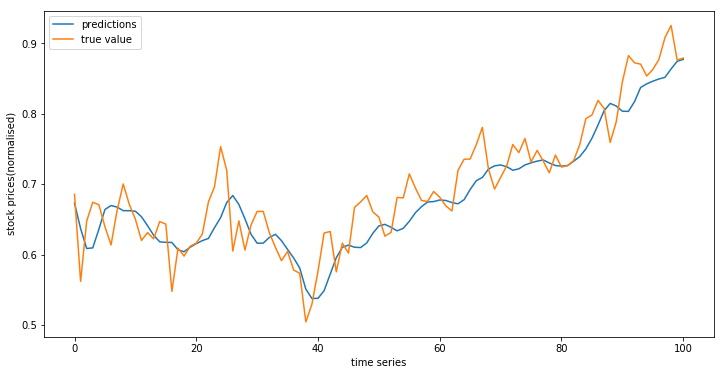

In [216]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [30,30,30], time step = 75

In [217]:
myrnn = RNN((75,2), 1 ,num_hidden_layers=3,list_num_nodes=[30,30,30])
features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 150, 80)
X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/150
529/529 [==============================] - 20s 38ms/step - loss: 0.1865 - mean_absolute_error: 0.3782
Epoch 2/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0361 - mean_absolute_error: 0.1492
Epoch 3/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0199 - mean_absolute_error: 0.1228
Epoch 4/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0137 - mean_absolute_error: 0.0906
Epoch 5/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0077 - mean_absolute_error: 0.0715
Epoch 6/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0681
Epoch 7/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0038 - mean_absolute_error: 0.0483
Epoch 8/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0026 - mean_absolute_error: 0.0397
Epoch 9/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0025 - mean_absolute_erro

529/529 [==============================] - 1s 2ms/step - loss: 8.3556e-04 - mean_absolute_error: 0.0220
Epoch 145/150
529/529 [==============================] - 1s 2ms/step - loss: 8.0281e-04 - mean_absolute_error: 0.0213
Epoch 146/150
529/529 [==============================] - 1s 2ms/step - loss: 8.0890e-04 - mean_absolute_error: 0.0217
Epoch 147/150
529/529 [==============================] - 1s 2ms/step - loss: 7.9653e-04 - mean_absolute_error: 0.0214
Epoch 148/150
529/529 [==============================] - 1s 2ms/step - loss: 7.6162e-04 - mean_absolute_error: 0.0211
Epoch 149/150
529/529 [==============================] - 1s 2ms/step - loss: 7.7014e-04 - mean_absolute_error: 0.0212
Epoch 150/150
529/529 [==============================] - 1s 2ms/step - loss: 7.3312e-04 - mean_absolute_error: 0.0208
0.01648220501218115


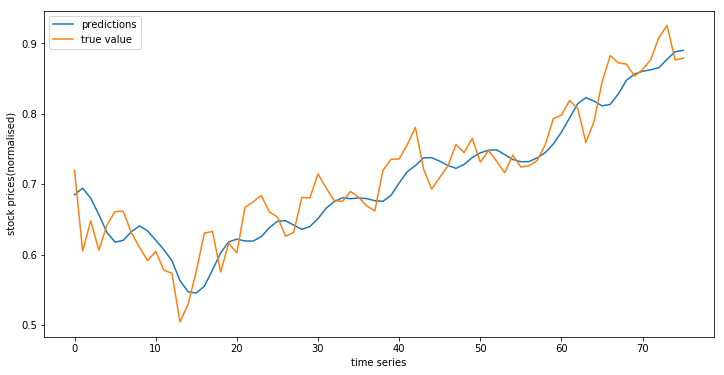

In [218]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [50,50,50], time step = 75

In [219]:
myrnn = RNN((75,2), 1 ,num_hidden_layers=3,list_num_nodes=[50,50,50])
features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 150, 80)
X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/150
529/529 [==============================] - 21s 40ms/step - loss: 0.1257 - mean_absolute_error: 0.2818
Epoch 2/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0245 - mean_absolute_error: 0.1362
Epoch 3/150
529/529 [==============================] - 1s 2ms/step - loss: 0.0150 - mean_absolute_error: 0.0956
Epoch 4/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0073 - mean_absolute_error: 0.0729
Epoch 5/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0506
Epoch 6/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0402
Epoch 7/150
529/529 [==============================] - 1s 1ms/step - loss: 0.0029 - mean_absolute_error: 0.0410
Epoch 8/150
529/529 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0362
Epoch 9/150
529/529 [==============================] - 1s 2ms/step - loss: 0.0023 - mean_absolute_erro

529/529 [==============================] - 1s 2ms/step - loss: 5.9208e-04 - mean_absolute_error: 0.0185
Epoch 144/150
529/529 [==============================] - 1s 2ms/step - loss: 6.0091e-04 - mean_absolute_error: 0.0188
Epoch 145/150
529/529 [==============================] - 1s 2ms/step - loss: 6.0106e-04 - mean_absolute_error: 0.0185
Epoch 146/150
529/529 [==============================] - 1s 2ms/step - loss: 6.2723e-04 - mean_absolute_error: 0.0188
Epoch 147/150
529/529 [==============================] - 1s 2ms/step - loss: 6.6188e-04 - mean_absolute_error: 0.0196
Epoch 148/150
529/529 [==============================] - 1s 2ms/step - loss: 6.0040e-04 - mean_absolute_error: 0.0186
Epoch 149/150
529/529 [==============================] - 1s 2ms/step - loss: 5.4774e-04 - mean_absolute_error: 0.0182
Epoch 150/150
529/529 [==============================] - 1s 2ms/step - loss: 5.5443e-04 - mean_absolute_error: 0.0181
0.016779381916051474


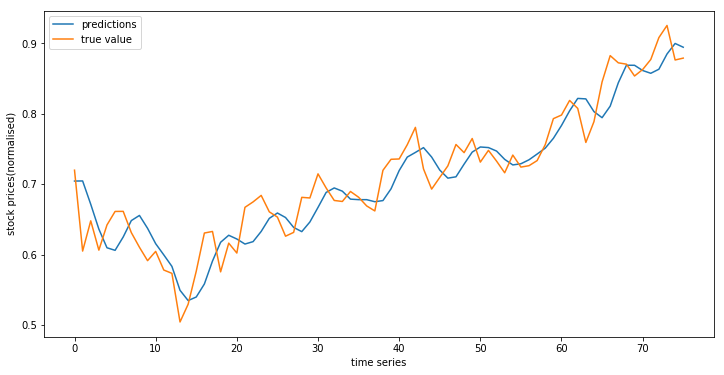

In [220]:
plotpred(pred, Y_test_reshape)

## LSTM with Hidden Layers =3 and nodes = [80,80,80], time step = 75

In [221]:
myrnn = RNN((75,2), 1 ,num_hidden_layers=3,list_num_nodes=[80,80,80])
# features, label = create_features(75, X_train, Y_train)
myrnn.fit(features, label, 100, 100)
# X_test_reshape, Y_test_reshape = create_features(75, X_test, Y_test)
pred = myrnn.model.predict(X_test_reshape)
mse = np.mean((pred - Y_test_reshape)**2)
print(mse)

Epoch 1/100
529/529 [==============================] - 27s 51ms/step - loss: 0.1241 - mean_absolute_error: 0.2779
Epoch 2/100
529/529 [==============================] - 5s 9ms/step - loss: 0.0251 - mean_absolute_error: 0.1317
Epoch 3/100
529/529 [==============================] - 5s 9ms/step - loss: 0.0208 - mean_absolute_error: 0.1103
Epoch 4/100
529/529 [==============================] - 5s 9ms/step - loss: 0.0117 - mean_absolute_error: 0.0938
Epoch 5/100
529/529 [==============================] - 5s 10ms/step - loss: 0.0070 - mean_absolute_error: 0.0650
Epoch 6/100
529/529 [==============================] - 6s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0494
Epoch 7/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0035 - mean_absolute_error: 0.0451
Epoch 8/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0032 - mean_absolute_error: 0.0426
Epoch 9/100
529/529 [==============================] - 6s 10ms/step - loss: 0.0028 - mean_absolute

Epoch 73/100
529/529 [==============================] - 5s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0279
Epoch 74/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0017 - mean_absolute_error: 0.0306
Epoch 75/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0291
Epoch 76/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0285
Epoch 77/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0274
Epoch 78/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0263
Epoch 79/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0258
Epoch 80/100
529/529 [==============================] - 6s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0289
Epoch 81/100
529/529 [==============================] - 6s 10ms/step - loss: 0.0014 - me

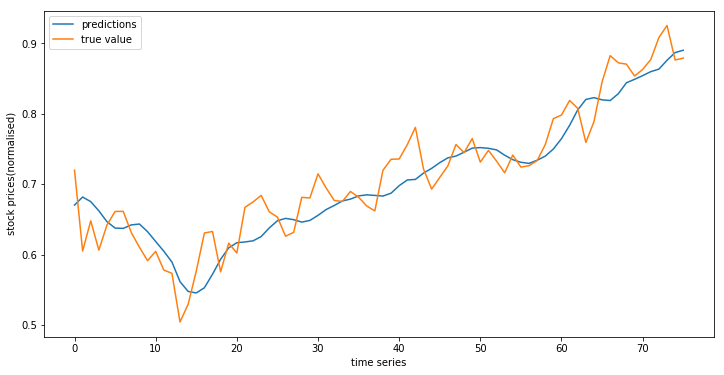

In [222]:
plotpred(pred, Y_test_reshape)

## PART-1 Q2

Perform stock prediction using HMM where you will need to vary
Number of Number of Hidden States: 4,8,12 ; Time steps: 20,50,75
Note: Get results for total 9 combinations from above table. For example, 1 combination will contain 4 hidden states, and the number of time steps will be 20. So this combination will be denoted as HMM(4,20)

In [16]:
labels = data["open"]
data_hmm = data.iloc[:,[0,2]]
data_hmm.shape

(755, 2)

In [25]:
from sklearn.preprocessing import MinMaxScaler
labels_scaler = MinMaxScaler()
labels_scaled = labels_scaler.fit_transform(np.array(labels).reshape(-1,1))
labels_scaled = labels_scaled.reshape(755,)

In [26]:
data_scaler = MinMaxScaler()
data_scaled = data_scaler.fit_transform(data_hmm)

In [17]:

from hmmlearn.hmm import GaussianHMM


from matplotlib import cm, pyplot as plt



class ModelHMM():
    def __init__(self,n_days_previous, n_states, verbose, n_decimals, latex):
#         self.company = company
#         self.day_start = day_start
#         self.day_end = day_end
        self.n_days_previous = n_days_previous
        self.n_states = n_states
        self.verbose = verbose
        self.print_model = verbose
        self.n_decimals = n_decimals
        self.latex = latex

    def _get_value_by_positions(self, df, start_index, end_index):
        X = df.ix[start_index:end_index]
        dates = np.array([q for q in pd.to_datetime(X.reset_index()['Date'], unit='s')])
        close_v = np.array([q for q in X['Close']])
        volume_v = np.array([q for q in X['Volume']])
        high_v = np.array([q for q in X['High']])
        open_v = np.array([q for q in X['Open']])
        low_v = np.array([q for q in X['Low']])

        dates = dates
        close_v = close_v
        volume_v = volume_v
        high_v = high_v
        open_v = open_v
        low_v = low_v
        # return dates, close_v, volume_v, high_v, open_v, low_v

        if (abs(start_index - end_index) == 1):
            l_X, l_dates, l_close_v, l_volume_v, l_high_v, l_open_v, l_low_v = self._get_value_by_positions(df,
                                                                                                            start_index - 1,
                                                                                                            end_index + 1)
            # Truong hop can predict => khong duoc su dung close_v => thay bang uoc luong khac
            return np.column_stack([(open_v - [l_close_v[0]]) / l_close_v[0], (high_v - open_v) / open_v,
                                    (low_v - open_v) / open_v]), dates, close_v, volume_v, high_v, open_v, low_v
        else:
            # Truong hop tao data cho training
            return np.column_stack([(close_v - open_v) / open_v, (high_v - open_v) / open_v,
                                    (low_v - open_v) / open_v]), dates, close_v, volume_v, high_v, open_v, low_v

    def _show_plot(self, dates, close_v, hidden_states, title):
        years = YearLocator()  # every year
        months = MonthLocator()  # every month
        yearsFmt = DateFormatter('%Y/%m')
        fig = plt.figure()
        ax = fig.add_subplot(111)
        fig.canvas.set_window_title(title)

        value = hidden_states
        ax.plot_date(dates, close_v, '-', label="Actual value")
        ax.plot_date(dates, value, '-', label="Predicted value")

        ax.legend()

        # format the ticks
        ax.xaxis.set_major_formatter(yearsFmt)
        ax.autoscale_view()

        # format the coords message box
        ax.fmt_xdata = DateFormatter('%Y-%m')
        # ax.fmt_ydata = lambda x: '$%1f' % x
        ax.grid(True)

        fig.autofmt_xdate()
        plt.savefig('plot.png')
        plt.show()

        error = np.sum(np.abs((close_v - hidden_states) * 1.0 / close_v)) * 100.0 / close_v.shape[0]
        return error

    def predict(self):
        self._predict(self.company, self.day_start, self.day_end, self.n_days_previous, self.n_states)

    def _predict(self, company, day_start, day_end, n_previous, n_cluster):
        df = web.DataReader(company, 'google', day_start, day_end)
        n_days = df.shape[0]

        v_X, v_dates, v_close_v, v_volume_v, v_high_v, v_open_v, v_low_v = self._get_value_by_positions(df, 0, n_days)
        predicted = []
        counting_error = 0

        for i in range(n_previous, n_days):
            model = GaussianHMM(n_components=n_cluster, covariance_type="diag", n_iter=2, verbose=False,
                                init_params='mstc')
            X, dates, close_v, volume_v, high_v, open_v, low_v = self._get_value_by_positions(df, i - n_previous, i)
            if (self.verbose == True):
                print "Predicting in", i - n_previous + 1, "th/", n_days - n_previous + 1, "days..."

            # try:
            temp_model = model.fit(X)

            if (self.print_model == True):
                np.set_printoptions(precision=self.n_decimals)
                if (self.latex == False):
                    print "Transform matrix : "
                    print np.around(np.array(temp_model.transmat_), decimals=self.n_decimals)
                    print "Starting probability : "
                    print np.around(np.array(temp_model.startprob_), decimals=self.n_decimals)
                else:
                    print "Transform matrix : "
                    temp_mat = np.around(np.array(temp_model.transmat_), decimals=self.n_decimals)

                    print "\hline"
                    for xxx in temp_mat:
                        print " & ".join([str(x) for x in xxx]), " \\\\"
                        print "\hline"

                    print "Starting probability : "
                    temp_mat = np.around(np.array(temp_model.startprob_), decimals=self.n_decimals)
                    print "\hline"
                    print " & ".join([str(x) for x in temp_mat]), " \\\\"
                    print "\hline"
                self.print_model = False

            X, dates, close_v, volume_v, high_v, open_v, low_v = self._get_value_by_positions(df, i, i + 1)
            hidden_states = temp_model.predict(X)
            predicted.append(temp_model.means_[hidden_states[0]][0]/10 * open_v[0] + open_v[0])
            # except:
            #     counting_error += 1
            #     print(counting_error)
            #     X, dates, close_v, volume_v, high_v, open_v, low_v = self._get_value_by_positions(df, i, i + 1)
            #     predicted.append(open_v[0])

        final_time = time.time() - start_time
        print "Finished predicting", n_days - n_previous + 1, "days in ", final_time, " s"
        print "Predicting time each day: ", final_time/(n_days - n_previous + 1), " s"
        error = self._show_plot(v_dates[n_previous:], v_close_v[n_previous:], predicted, 'Trained data')
        print "Mean absolute percentage error MAPE = ", error, '%'


####Running#########
start_time = time.time()
day_start = datetime.datetime(2016, 1, 1)
day_end = pd.datetime.today()

model = ModelHMM(company="AAPL", day_start=day_start, day_end=day_end, n_days_previous=200, n_states=10, verbose=True, n_decimals = 3, latex = True)
model.predict()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Predicting in", i - n_previous + 1, "th/", n_days - n_previous + 1, "days...")? (<ipython-input-17-a230cf4e52c1>, line 96)